                    Mensagens_Enviadas  Porcentagem
Nome_Completo                                      
Jonas Pelegrina                  25134    60.941251
Leonardo Zapparoli               16109    39.058749


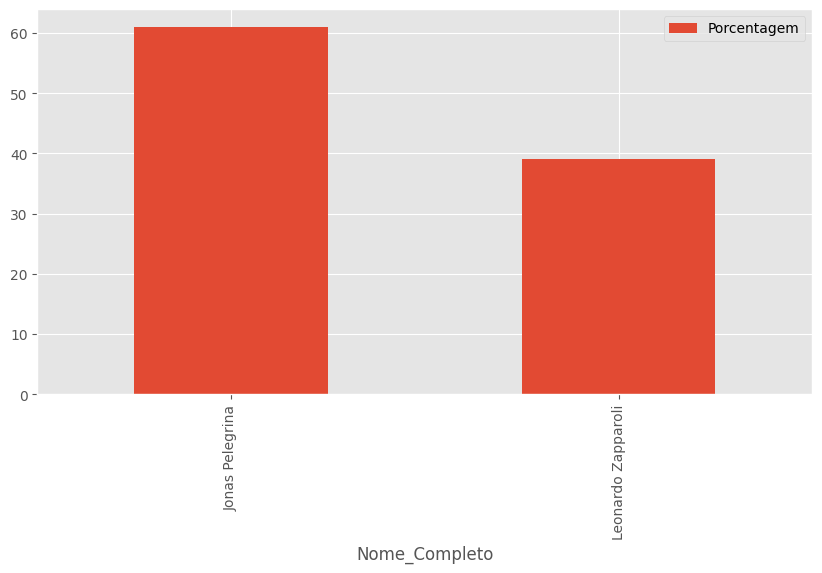

In [29]:
import pandas as pd
import re
with open("data/leobr.txt", "r", encoding="utf-8") as file:
    lines = file.readlines()
df = pd.DataFrame(lines, columns=["Mensagens_Enviadas"])

df['Nome_Completo'] = df['Mensagens_Enviadas'].str.extract(r'\]\s(.*?):')
df_consolido = df.groupby('Nome_Completo').count()
df_consolido = df_consolido.sort_values(by=['Mensagens_Enviadas'], ascending=False)
df_consolido["Porcentagem"] = df_consolido["Mensagens_Enviadas"] / df_consolido["Mensagens_Enviadas"].sum() * 100
print(df_consolido.head(10))

#Gerar um grafico
import matplotlib.pyplot as plt
df_consolido.head(10).plot(kind='bar', y='Porcentagem', figsize=(10,5))
plt.show()



Horários específicos mais utilizados
Horario
22:26    151
22:27    144
22:28    142
22:48    141
22:52    140
Name: count, dtype: int64
Hora
22.0    5701
21.0    3925
23.0    3901
19.0    3827
20.0    2825
Name: count, dtype: int64


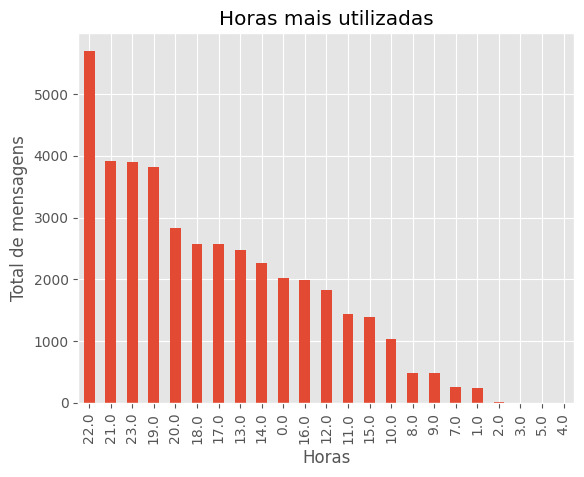

In [32]:
#Pegar o horário das mensagens
df["Horario"] = df["Mensagens_Enviadas"].str.extract(r"(\d{2}:\d{2})")
print("Horários específicos mais utilizados")
print(df["Horario"].value_counts().head())

#Separar por intervalo de horas
df["Horario"] = pd.to_datetime(df["Horario"], format="%H:%M")
df["Hora"] = df["Horario"].dt.hour
print(df["Hora"].value_counts().head())

#Faça um grafico com os horas mais utilizados
import matplotlib.pyplot as plt
plt.style.use("ggplot")
df["Hora"].value_counts().plot.bar(title="Horas mais utilizadas")
plt.xlabel("Horas")
plt.ylabel("Total de mensagens")
plt.show()

In [34]:
padrao = r'\[(.*?)\] (.*?): (.*)'

# Use str.extract para extrair as mensagens e criar uma nova coluna
df['Mensagem_Extraida'] = df['Mensagens_Enviadas'].str.extract(padrao)[2]

# Pegar palavras mais frequentes
palavras = df["Mensagem_Extraida"].str.cat(sep=" ")
palavras = re.findall(r'\w+', palavras.lower())
palavras = pd.Series(palavras)

#Excluir palavras com menos de 3 caracteres
palavras = palavras[palavras.str.len() > 5]

#Retirar palavras específicas
remover_palavras = ["figurinha", "omitida","omitida" "imagem", "ocultada","ocultado","kkkkkkkk","kkkkkkk","kkkkkk","kkkkkkkkk","kkkkkkkkkk","kkkkkkk","kkkkkkkk","kkkkkkkkkkk","kkkkkkkkkkkk","imagem","kakakakakaka","kakaka","kakakaka","kkkkkkkkkkkkk","huahuahuahua","hahahaha","hahaha","kakakak","hahahahaha","omitido","kakakakakkaka"]
palavras = palavras[~palavras.isin(remover_palavras)]
print("Paravras mais utilizadas")
print(palavras.value_counts().head(20))



Paravras mais utilizadas
depois        271
quando        271
comprar       264
coisas        218
parece        198
verdade       197
fazendo       173
também        173
alguma        167
negócio       166
melhor        148
precisa       146
preciso       144
exatamente    140
mandar        139
colocar       136
quiser        136
entendi       133
google        127
semana        126
Name: count, dtype: int64
